
# HYPERUNIFORMITY NUMERICAL PROJECT #
Monroy Merida Diana Laura, Candellone Elena, Ghivarello Sara, Pierannunzi Elena  

In [27]:
#import useful packages
import numpy as np
import matplotlib.pyplot as plt
from numpy import random
import time

# Matrix generation
generate a matrix of size 2L x 2L (our matrix L x L with an outer shell that is needed in order to take into account PBC)

the matrix is constucted in such a way that in every position there are the coordinates of the particle

EXAMPLE for L = 1:

$$ a = create(1) =  \begin{bmatrix}
[0,0] & [0,1] \\
[1,0] & [1,1] 
\end{bmatrix}  $$

In [28]:
def create(L) :
    return [[x_0,x_1] for x_0 in range(2*L) for x_1 in range(2*L)]

# Distance between patricles

Takes a point $x_0$ and a matrix. Returns an array that contains the distances between all points of the matrix and $x_0$.

i.e. $$ arr\_dist = [distance(x_0,x_1),distance(x_0,x_2) ...]$$

In [29]:
def distance(x_0,matrix):
#arrays with all x and y coordinates of matrix elements
    x = [sites[0] for sites in matrix]
    y = [sites[1] for sites in matrix]
    delta_x = [abs(x_0[0]-i) for i in x]
    delta_y = [abs(x_0[1]-j) for j in y]
#store all the distances into an array
    arr_dist = [(delta_x[i]**2 + delta_y[i]**2)**(1/2) for i in range(len(delta_x))]
    return arr_dist

# Radii generation
Generate an array, given the size of the matrix L and the number of steps, with

$$ \{r\} \mid r \in [0.1,L/2] $$ with a certain number of values (steps)

In [30]:
def radii(L, steps):
    radius = np.linspace(0.1,L/2,num=steps)
    return radius

# Center random generation
Choose randomly a center $x_0$ inside the matrix of size L x L

Generate an array with n values of $x_0$

In [31]:
def x_0(L):                                                                              
    x = random.uniform(round(L/2),round(3*L/2))
    y = random.uniform(round(L/2),round(3*L/2))
    center = [x,y]
    return center

def vec_x0(L,n):
    v = [x_0(L) for i in range(n)]
    return v

# Count the neighbours
This function counts how many particles are into a certain distance from the center $x_0$.

In particular, we give as a parameter an array of radii and we store in the array counts all the countings for each radius.
i.e. $$count = [ count\_R(r1), count\_R(r2) ... ]$$

In [32]:
def count(x_0,mat,radius):
    L = len(mat)
    dist = distance(x_0,mat)
    #dist.sort()
    d = np.array(dist)
    counts = []
    for R in radius:
        count_R = np.count_nonzero(d <= R)
        counts.append(count_R)
    return counts

Generate an matrix (array of arrays) with the countings for each value of x_0 (take n of them).
The matrix will have rows determined by $\{x_0\}$ and columns determined by $\{R\}$

In [33]:
def arr_counts(L,n,radius,mat):
    v = vec_x0(L,n)
    arr = [count(x0,mat,radius) for x0 in v]
    return arr

# Calculate the rescaled variance
This functions takes the size L, the number n of $x_0$'s, the set of radii and the matrix in order to calculate the rescaled variance $$\frac{\sigma(R)^2}{R^2 }= \frac{\langle N(R)^2 \rangle - \langle N(R) \rangle^2}{R^2}$$
For each size L an array of variances is created.

In [34]:
def variance(L,n,radius,mat):
    arr = arr_counts(L,n,radius,mat)
    m = np.array(arr)
    arr_var = []
    for i in range(len(radius)):
        mom = np.power(m[:,i],2)
        var = (np.average(mom)-np.power(np.average(m[:,i]),2))/radius[i]**2
        arr_var.append(var)
    return arr_var

# 1.1
Write a simple code displaying point particles on a square lattice of linear size L = 10.

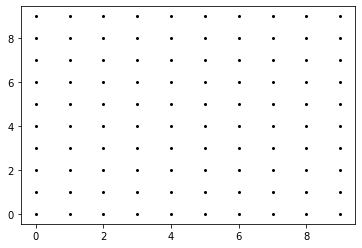

In [35]:
L = 10
a = create(int(L/2))                      #here I want to show just the L x L matrix, ignoring the outer cell
x = [sites[0] for sites in a]
y = [sites[1] for sites in a]
plt.plot(x,y,'o', color='black', markersize=2)
plt.show()

# 1.2
Justify why the maximum distance for measuring the variance is L/2.

Calculate the mean variance as a function of r for $L = [50,100,200]$

In [ ]:
start = time.time()
size = [50,100,200]
arrays_var = []
radius = []


for i in range(len(size)):
    a = create(size[i])
    radius.append(radii(size[i],200))
    arrays_var.append(variance(size[i],10000,radius[i],a))
    
    
total = time.time()-start

In [ ]:
print("total exectution time" + str(total) + "seconds")

In [ ]:
#plot the results in log-log scale

for i in range(len(size)):
    plt.plot(radius[i], arrays_var[i], label = 'L =' + str(size[i]))

plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.show()

# 1.3
Comment the
results : why do $\frac{\sigma(R)^2}{R^2 }$ goes to a constant at short distance ? What are the reasons of
the oscillations of the curve ? 
The straight line corresponds to the asymptotic behavior of variance at long distance.
Why do the amplitudes of the oscillations decrease at long distance ?

In order to understand why the curve oscillate we can think at the simplest case, when the center of the observed circle corresponds to a site of the lattice. Let's distinguish the 2 behaviours determining the oscillation, starting from a maximum of the curve: the decreasing and the subsequent increasing of $\frac{\sigma^2}{R^2}$ for a small increase of R. Let's visualize the configuration which realises the maximum on a single lattice cell: the arc of the perimeter of the circle is cutting the cell very close to a corner, i.e. a lattice point. But, increasing R, we have to wait the circle reaches the farther two diagonal corners of the cell in order for N(R) to increase: so, N(R) remains constant while R increases, meaning that the ratio diminishes, until the minimum is reached. Then, once R has increased sufficiently for the circle to enclose the other two sites, N(R) will increase and determine the maximum, and so on when a farther cell is reached. Since this behaviour is periodic, the same line of reasoning is valid when the circle is centered in a point different from a site.